In [ ]:
# prompt: import data của tôi

from google.colab import files
uploaded = files.upload()


Saving Churn.csv to Churn.csv


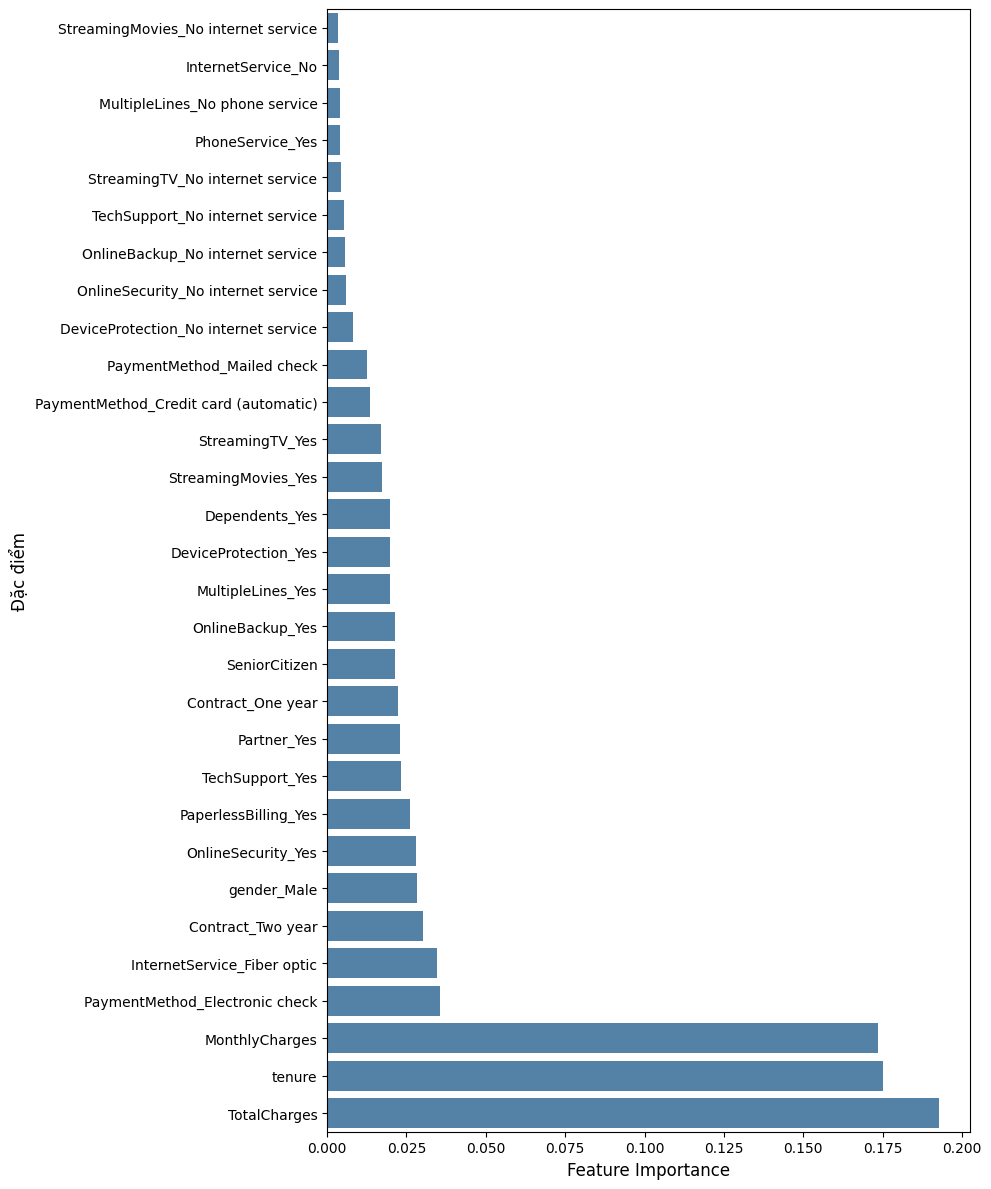

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Đọc dữ liệu
data = pd.read_csv('Churn.csv')

# Xử lý missing values (nếu có cột TotalCharges chứa khoảng trắng)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data = data.dropna()  # Bỏ hàng bị thiếu sau khi chuyển

# Bỏ cột không cần thiết
data = data.drop('customerID', axis=1)

# Mã hóa cột target
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

# One-hot encode các biến phân loại
data_encoded = pd.get_dummies(data, drop_first=True)

# Tách features và target
X = data_encoded.drop('Churn', axis=1)
y = data_encoded['Churn']

# Huấn luyện Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Feature importance
feature_importance = model.feature_importances_
feature_names = X.columns

# DataFrame cho feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Sắp xếp và vẽ biểu đồ
importance_df = importance_df.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10, 12))
sns.barplot(x='Importance', y='Feature', data=importance_df, color='steelblue')
plt.title('', fontsize=14)
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('Đặc điểm', fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
import lightgbm as lgb
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier




# Đọc dữ liệu
data = pd.read_csv('Churn.csv')

# Xử lý missing values (cột TotalCharges có thể chứa khoảng trắng)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data = data.dropna()

# Bỏ cột không cần thiết
data = data.drop('customerID', axis=1)

# Mã hóa biến target thành 0/1
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

# One-hot encode các biến phân loại
data_encoded = pd.get_dummies(data, drop_first=True)

# Tách features và target
X = data_encoded.drop('Churn', axis=1)
y = data_encoded['Churn']

# Chia dữ liệu thành train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo 3 mô hình
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'LightGBM': lgb.LGBMClassifier(random_state=42)
}

# Huấn luyện và đánh giá accuracy
accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy
    print(f'{name} Accuracy: {accuracy:.4f}')

# Chọn model tốt nhất
best_model_name = max(accuracies, key=accuracies.get)
best_model = models[best_model_name]
print(f'\nBest Model: {best_model_name} với accuracy {accuracies[best_model_name]:.4f}')

# Dự đoán churn mới trên toàn bộ tập dữ liệu
predicted_churn = best_model.predict(X)
data_encoded['predicted_Churn'] = predicted_churn

# So sánh Churn gốc và Churn dự đoán: in ra vài dòng đầu
print("\nSo sánh Churn gốc và Churn dự đoán:")
print(data_encoded[['Churn', 'predicted_Churn']].head(10))

# Tính tỷ lệ dự đoán đúng trên toàn bộ tập
overall_accuracy = (data_encoded['Churn'] == data_encoded['predicted_Churn']).mean()
print(f"\nTỷ lệ dự đoán đúng trên toàn bộ dữ liệu: {overall_accuracy:.4f}")

# Tính feature importance dựa trên model tốt nhất
if best_model_name == 'Logistic Regression':
    importance = np.abs(best_model.coef_[0])
elif best_model_name == 'Gradient Boosting':
    importance = best_model.feature_importances_
elif best_model_name == 'SVM':
    importance = np.abs(best_model.coef_[0])
else:
    importance = np.zeros(X.shape[1])  # fallback

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.7875
Gradient Boosting Accuracy: 0.7896
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1495, number of negative: 4130
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001435 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 5625, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265778 -> initscore=-1.016151
[LightGBM] [Info] Start training from score -1.016151
LightGBM Accuracy: 0.7910

Best Model: LightGBM với accuracy 0.7910

So sánh Churn gốc và Churn dự đoán:
   Churn  predicted_Churn
0      0                1
1      0                0
2      1                0
3      0                0
4      1                1
5      1                1
6      

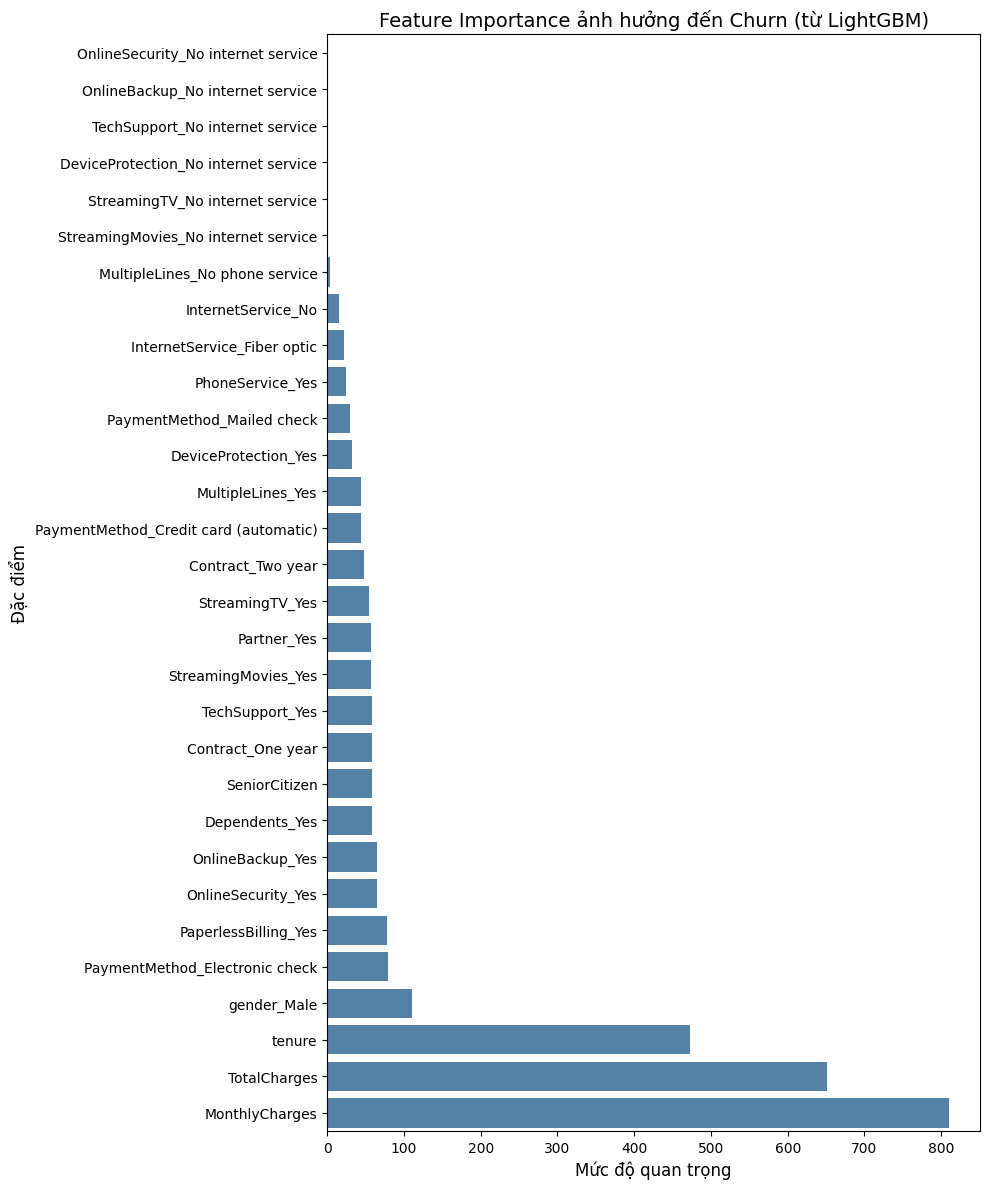

In [ ]:
# prompt: visualize các nhân tố ảnh hưởng đến predicted_Churn dựa trên mô hình tốt nhất

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
if hasattr(best_model, 'feature_importances_'):
    importance = best_model.feature_importances_
elif hasattr(best_model, 'coef_'):
    importance = np.abs(best_model.coef_[0])
else:
    print(f"Feature importance is not directly available for {best_model_name}.")
    importance = None

if importance is not None:
    feature_names = X.columns

    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importance
    })

    # Sắp xếp và vẽ biểu đồ
    importance_df = importance_df.sort_values(by='Importance', ascending=True)

    plt.figure(figsize=(10, 12))
    sns.barplot(x='Importance', y='Feature', data=importance_df, color='steelblue')
    plt.title(f'Feature Importance ảnh hưởng đến Churn (từ {best_model_name})', fontsize=14)
    plt.xlabel('Mức độ quan trọng', fontsize=12)
    plt.ylabel('Đặc điểm', fontsize=12)
    plt.tight_layout()
    plt.show()


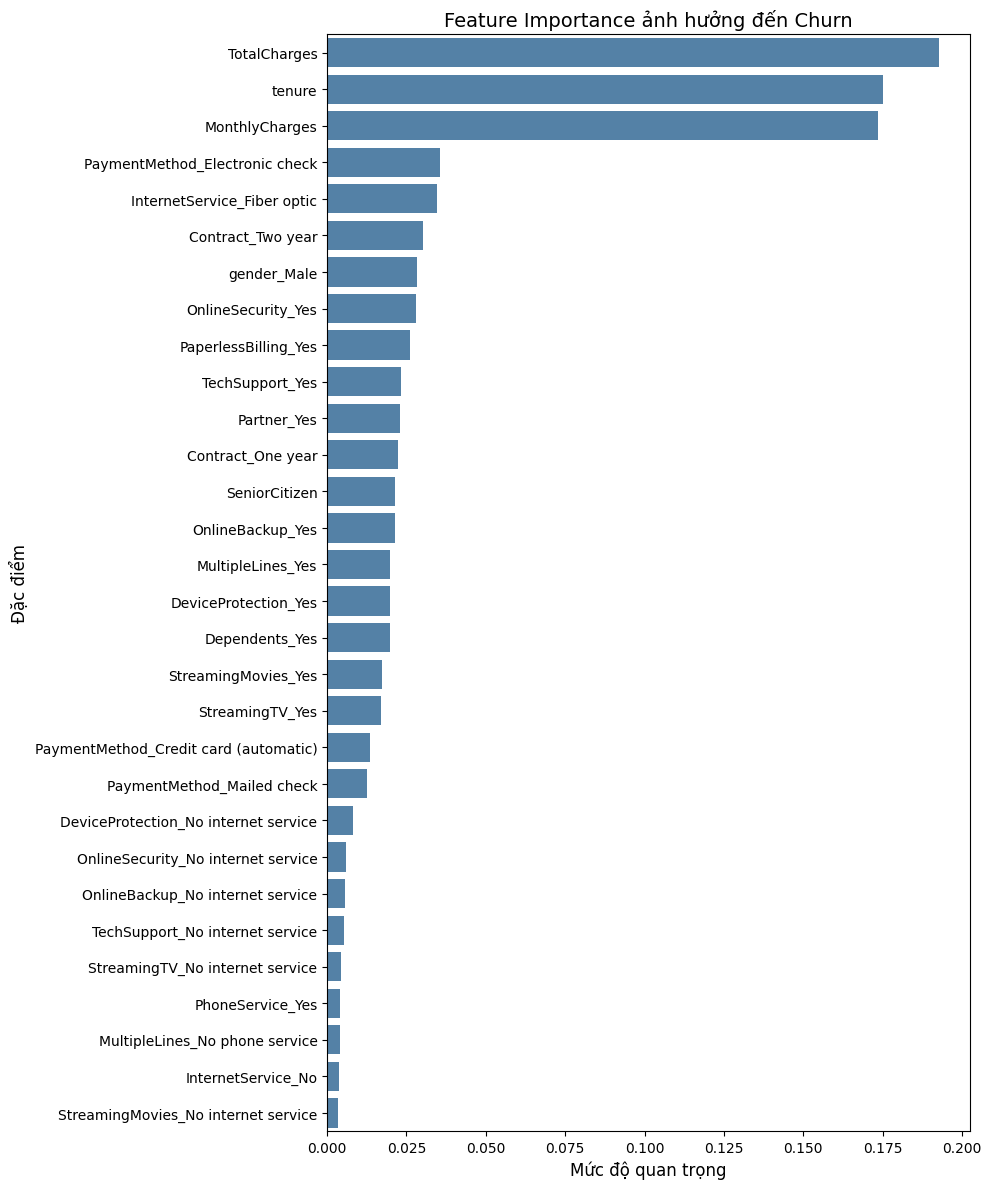

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.7875
Gradient Boosting Accuracy: 0.7896
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1495, number of negative: 4130
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000621 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 5625, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265778 -> initscore=-1.016151
[LightGBM] [Info] Start training from score -1.016151
LightGBM Accuracy: 0.7910

✅ Best Model: LightGBM với accuracy 0.7910

📊 So sánh:
   Churn  predicted_Churn
0      0                1
1      0                0
2      1                0
3      0                0
4      1                1
5      1                1
6      0                0
7   

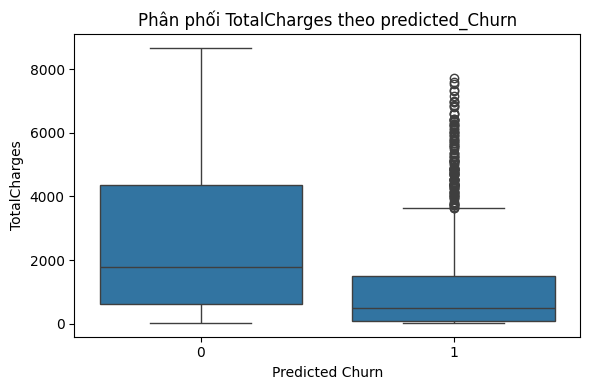

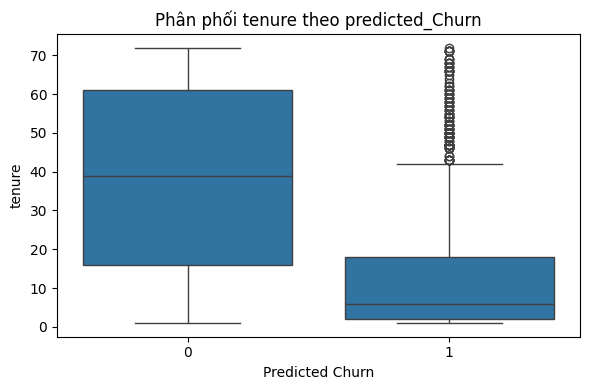

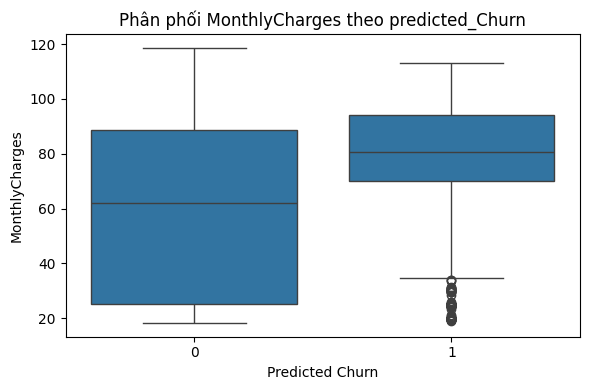

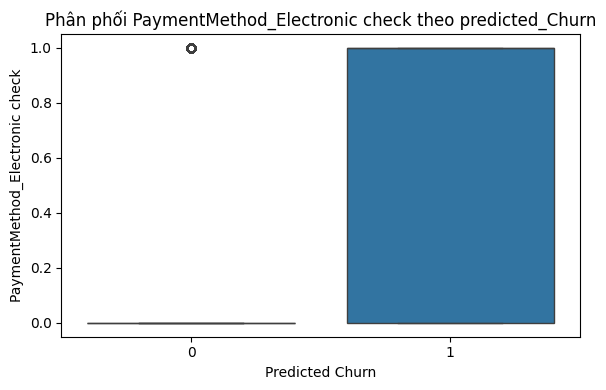

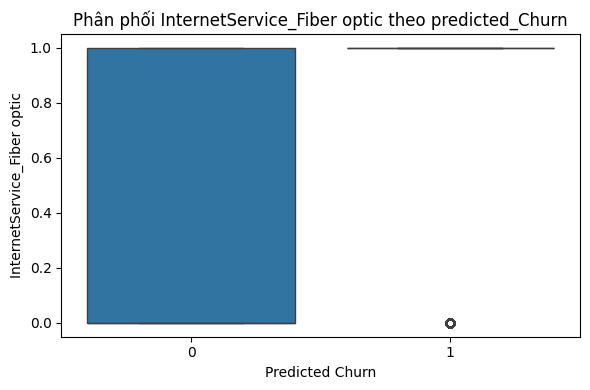

In [ ]:
# 1. Import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import lightgbm as lgb

# 2. Đọc dữ liệu
data = pd.read_csv('Churn.csv')
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data = data.dropna()
data = data.drop('customerID', axis=1)
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})
data_encoded = pd.get_dummies(data, drop_first=True)

# 3. Tách X và y
X = data_encoded.drop('Churn', axis=1)
y = data_encoded['Churn']

# 4. Huấn luyện Random Forest để phân tích yếu tố ảnh hưởng
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

feature_importance = rf_model.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# 5. Vẽ biểu đồ feature importance
plt.figure(figsize=(10, 12))
sns.barplot(x='Importance', y='Feature', data=importance_df, color='steelblue')
plt.title('Feature Importance ảnh hưởng đến Churn', fontsize=14)
plt.xlabel('Mức độ quan trọng', fontsize=12)
plt.ylabel('Đặc điểm', fontsize=12)
plt.tight_layout()
plt.show()

# 6. Áp dụng 3 mô hình để dự đoán churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'LightGBM': lgb.LGBMClassifier(random_state=42)
}

accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy
    print(f'{name} Accuracy: {accuracy:.4f}')

# 7. Chọn mô hình tốt nhất
best_model_name = max(accuracies, key=accuracies.get)
best_model = models[best_model_name]
print(f'\n✅ Best Model: {best_model_name} với accuracy {accuracies[best_model_name]:.4f}')

# 8. Dự đoán churn mới trên toàn bộ dữ liệu
data_encoded['predicted_Churn'] = best_model.predict(X)

# 9. So sánh churn thật và churn dự đoán
print("\n📊 So sánh:")
print(data_encoded[['Churn', 'predicted_Churn']].head(10))
overall_accuracy = (data_encoded['Churn'] == data_encoded['predicted_Churn']).mean()
print(f"\n🎯 Tỷ lệ dự đoán đúng toàn bộ: {overall_accuracy:.4f}")

# 10. Phân tích giá trị của các yếu tố ảnh hưởng (gốc)
top_features = importance_df.head(5)['Feature'].tolist()
print("\n🔍 Giá trị trung bình của top 5 đặc trưng theo Churn thật:")
for feature in top_features:
    mean_churn = data_encoded[data_encoded['Churn'] == 1][feature].mean()
    mean_no_churn = data_encoded[data_encoded['Churn'] == 0][feature].mean()
    print(f"{feature} - Churn: {mean_churn:.2f}, No Churn: {mean_no_churn:.2f}")

# 11. Phân tích lại theo predicted_Churn
print("\n🔍 Giá trị trung bình của top 5 đặc trưng theo predicted_Churn:")
for feature in top_features:
    mean_churn_pred = data_encoded[data_encoded['predicted_Churn'] == 1][feature].mean()
    mean_no_churn_pred = data_encoded[data_encoded['predicted_Churn'] == 0][feature].mean()
    print(f"{feature} - Dự đoán Churn: {mean_churn_pred:.2f}, Không churn: {mean_no_churn_pred:.2f}")

# 12. Biểu đồ phân phối các đặc trưng theo predicted_Churn
for feature in top_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='predicted_Churn', y=feature, data=data_encoded)
    plt.title(f'Phân phối {feature} theo predicted_Churn')
    plt.xlabel('Predicted Churn')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()


<Figure size 1000x600 with 0 Axes>

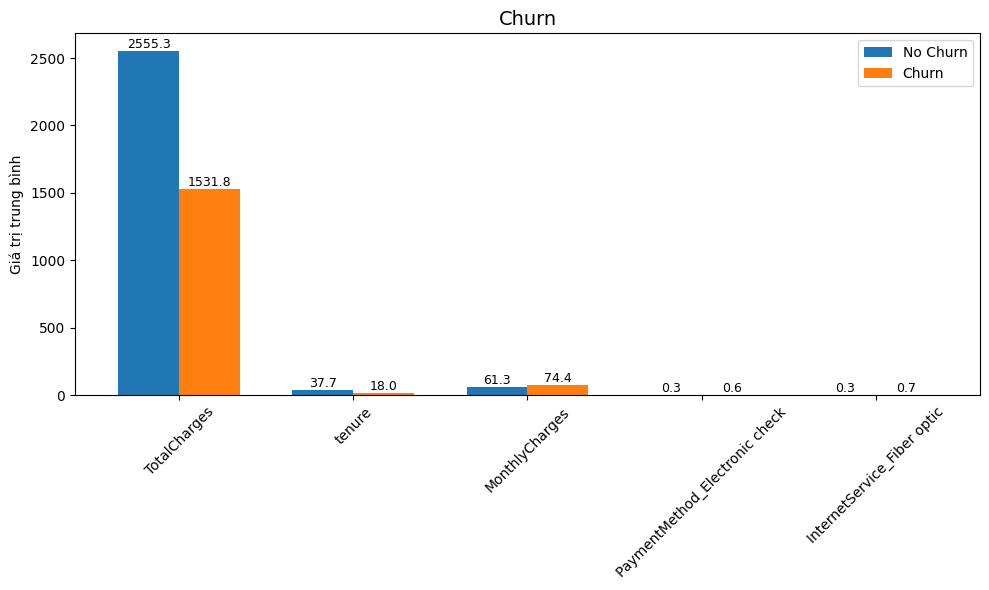

In [ ]:
# Vẽ biểu đồ cột có số trên cột - Churn thật
grouped_real = data_encoded.groupby('Churn')[top_features].mean().T
grouped_real.columns = ['No Churn', 'Churn']

plt.figure(figsize=(10, 6))
ax = grouped_real.plot(kind='bar', figsize=(10, 6), width=0.7)
plt.title('Churn', fontsize=14)
plt.ylabel('Giá trị trung bình')
plt.xticks(rotation=45)

# Ghi số lên trên cột
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

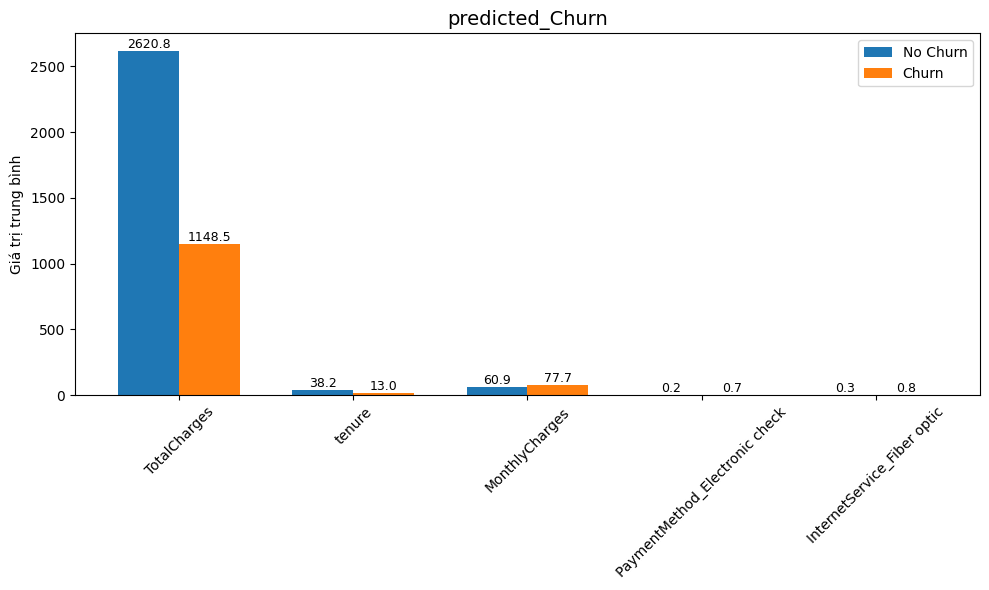

In [ ]:
# Vẽ biểu đồ cột có số trên cột - predicted_Churn
grouped_pred = data_encoded.groupby('predicted_Churn')[top_features].mean().T
grouped_pred.columns = ['No Churn', 'Churn']

plt.figure(figsize=(10, 6))
ax = grouped_pred.plot(kind='bar', figsize=(10, 6), width=0.7)
plt.title('predicted_Churn', fontsize=14)
plt.ylabel('Giá trị trung bình')
plt.xticks(rotation=45)

# Ghi số lên trên cột
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


<ipython-input-10-d4b76d9817e5>:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=melted, x='Feature', y='Mean', hue='Group', palette='Set2', ci=None)


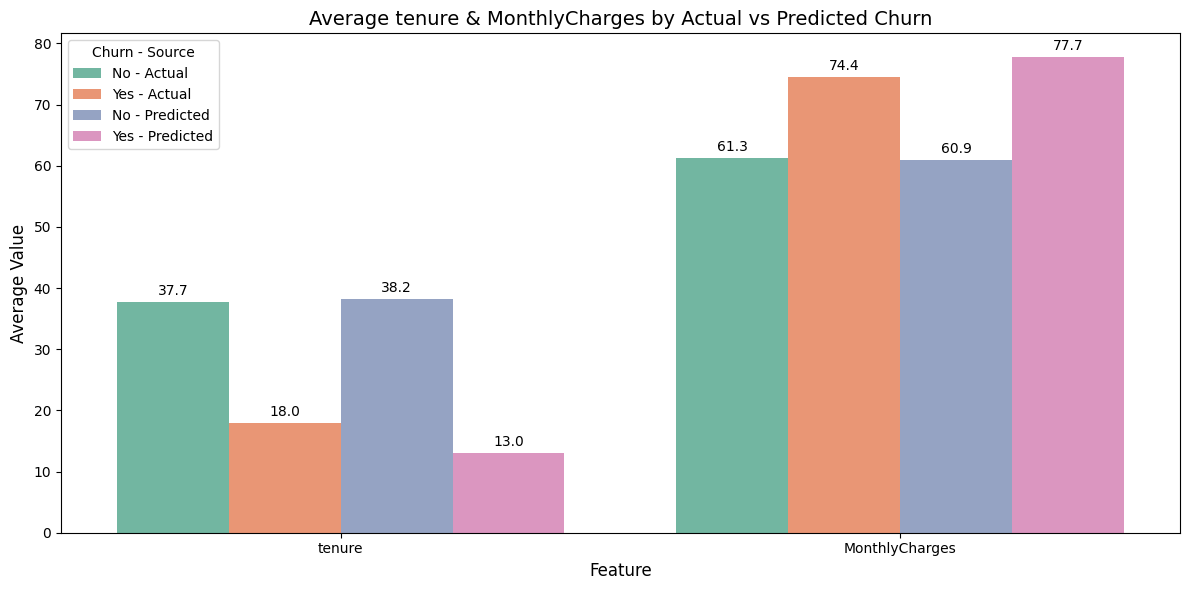

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Compute average of tenure and MonthlyCharges by true Churn
true_means = data_encoded.groupby('Churn')[['tenure', 'MonthlyCharges']].mean().reset_index()
true_means['Source'] = 'Actual'
true_means['Churn_Label'] = true_means['Churn'].map({0: 'No', 1: 'Yes'})

# Compute average of tenure and MonthlyCharges by predicted churn
pred_means = data_encoded.groupby('predicted_Churn')[['tenure', 'MonthlyCharges']].mean().reset_index()
pred_means['Source'] = 'Predicted'
pred_means['Churn_Label'] = pred_means['predicted_Churn'].map({0: 'No', 1: 'Yes'})
pred_means = pred_means.rename(columns={'predicted_Churn': 'Churn'})

# Combine both into one DataFrame
combined = pd.concat([
    true_means[['Churn_Label', 'tenure', 'MonthlyCharges', 'Source']],
    pred_means[['Churn_Label', 'tenure', 'MonthlyCharges', 'Source']]
])

# Create label for each bar group
combined['Group'] = combined['Churn_Label'] + ' - ' + combined['Source']

# Convert to long format for Seaborn
melted = pd.melt(combined, id_vars=['Group'], value_vars=['tenure', 'MonthlyCharges'],
                 var_name='Feature', value_name='Mean')

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=melted, x='Feature', y='Mean', hue='Group', palette='Set2', ci=None)

# Add value labels on top of bars
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.1f', label_type='edge', padding=3)

plt.title('Average tenure & MonthlyCharges by Actual vs Predicted Churn', fontsize=14)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Average Value', fontsize=12)
plt.legend(title='Churn - Source')
plt.tight_layout()
plt.show()


<ipython-input-11-04e8bf0f79f7>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=melted, x='Feature', y='Mean', hue='Churn_Label', palette='Set2', ci=None)


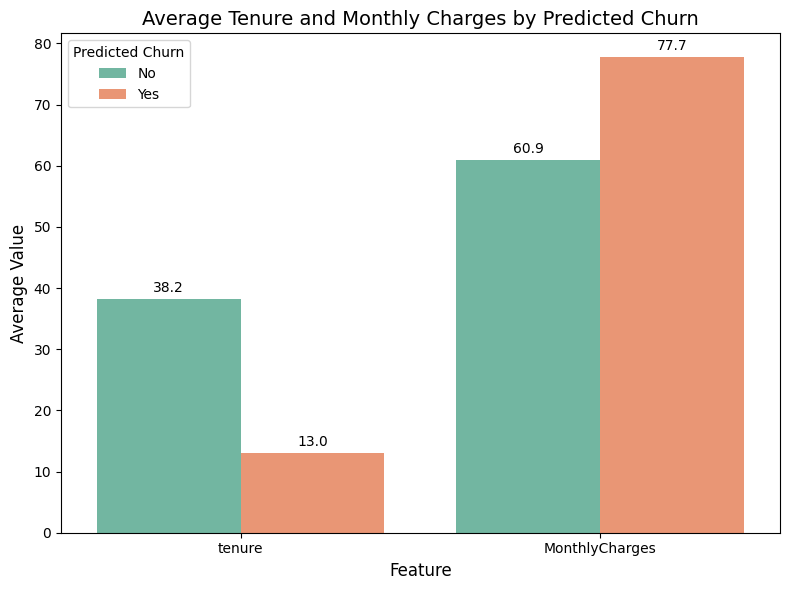

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculate average tenure and MonthlyCharges grouped by predicted churn
pred_means = data_encoded.groupby('predicted_Churn')[['tenure', 'MonthlyCharges']].mean().reset_index()
pred_means['Churn_Label'] = pred_means['predicted_Churn'].map({0: 'No', 1: 'Yes'})

# Reshape data for plotting
melted = pd.melt(pred_means, id_vars=['Churn_Label'], value_vars=['tenure', 'MonthlyCharges'],
                 var_name='Feature', value_name='Mean')

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=melted, x='Feature', y='Mean', hue='Churn_Label', palette='Set2', ci=None)

# Add value labels
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.1f', label_type='edge', padding=3)

plt.title('Average Tenure and Monthly Charges by Predicted Churn', fontsize=14)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Average Value', fontsize=12)
plt.legend(title='Predicted Churn')
plt.tight_layout()
plt.show()
